# Progetto del corso di Intelligenza Artificiale 2024
###### Camillo Matteo - matricola: 2042348
###### 06/06/2024
----

## Introduzione

È già stato mostrato durante il laboratorio 3 come un Multi-Layer Perceptron (MLP), che utilizza 2 strati nascosti con 500 neuroni ciascuno, anche solo con un training di 10 epoche, riesce a convergere e ad ottenere anche una buona accuratezza nei dati di test (98%).

Eseguirò quindi alcune simulazioni, in cui andrò a vedere singolarmente  quanta differenza può portare la modifica di diversi iperparametri rispetto a quelli di partenza, ed infine quanto migliora variandoli tutti contemporaneamente.

Come primo passaggio andiamo ad importare le librerie necessarie e il dataset, ovvero MNIST contenente i dati riguardanti le cifre manoscritte.

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from torchvision.datasets import MNIST
from torchvision.transforms import Lambda
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

Andiamo quindi a prenderci il nostro data set dividendolo in dati di allenamento e dati di test.

In [ ]:
%%capture
mnist_train = MNIST(root="../mnist",
                    train=True,      # dati di training
                    download=True)
mnist_test = MNIST(root="../mnist",
                    train=False,     # dati di test
                    download=True)

E infine dividiamo i dati tra i dati di input e le relative etichette, questo sia per il test che per il training.





In [ ]:
mnist_tr_in, mnist_tr_out = mnist_train.data.numpy(), mnist_train.targets.numpy()
mnist_te_in, mnist_te_out = mnist_test.data.numpy(), mnist_test.targets.numpy()

Inoltre le immagini sono salvate in un formato convenzionale per le immagini, dove ciascun pixel può assumere valori tra 0 e 255. Come secondo step normalizziamo quindi i valori nell'intervallo tra 0 e 1, semplicemente dividendo per 255.

Poiché i dati, delle immagini di MNIST, ci vengono forniti in formato bi-dimensionale (matrici 28x28) e visto che la nostra rete neurale può ricevere in input solo dati in formato di vettori, andremo a trasformarli quindi in matrici uni-dimensionali (matrici 1x784).

In [ ]:
mnist_tr_in = mnist_tr_in.reshape(60000, 28*28)
mnist_te_in = mnist_te_in.reshape(10000, 28*28)

Infine andiamo a normalizzare i dati nell'intervallo 0 e 1 per permettere un'ottimizzazione a gradienti più stabile.

In [ ]:
mnist_tr_in = mnist_tr_in / 255
mnist_te_in = mnist_te_in / 255

Teniamo quindi come riferimento il test con due layer nascosti e 500 neuroni ciascuno

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


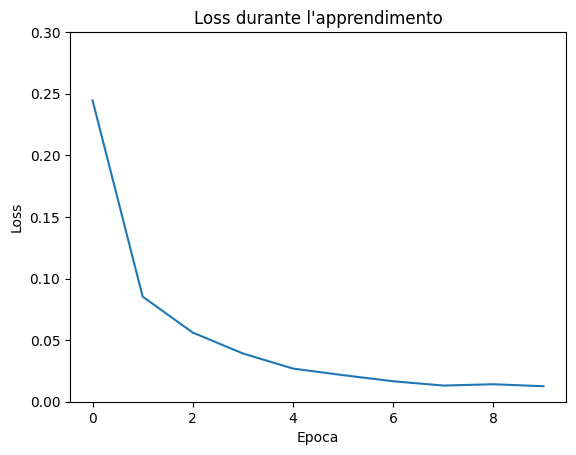

In [ ]:
random_state = 0

MLP = MLPClassifier(hidden_layer_sizes=(500, 500),
                    max_iter = 10,
                    random_state=random_state)

MLP = MLP.fit(mnist_tr_in, mnist_tr_out)

import matplotlib.pyplot as plt
import sklearn.metrics as metrics

_ = plt.plot(range(MLP.n_iter_), MLP.loss_curve_)
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")
plt.ylim(0, 0.3);


In [ ]:
MLP.score(mnist_te_in, mnist_te_out)

0.9811

# DOMANDA A: Prestazione modelli alla variazione di iperparametri

## Punto a - MLP

### Punto a - Test 1: Variazione numero neuroni per strato

Creiamo ora un MLP con due strati nascosti, lasciando i parametri di apprendimento di default, e procediamo con l'apprendimento.

In [ ]:
random_state = 0

MLP_more = MLPClassifier(hidden_layer_sizes=(1000, 1000),
                    max_iter = 10,
                    random_state=random_state)

MLP_less = MLPClassifier(hidden_layer_sizes=(100, 100),
                    max_iter = 10,
                    random_state=random_state)

In [ ]:
#5 minuti e mezzo
MLP_more = MLP_more.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#20 secondi
MLP_less = MLP_less.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Possiamo ora procedere visualizzando la curva dell'errore, l'accuratezza media e la matrice di confusione.

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

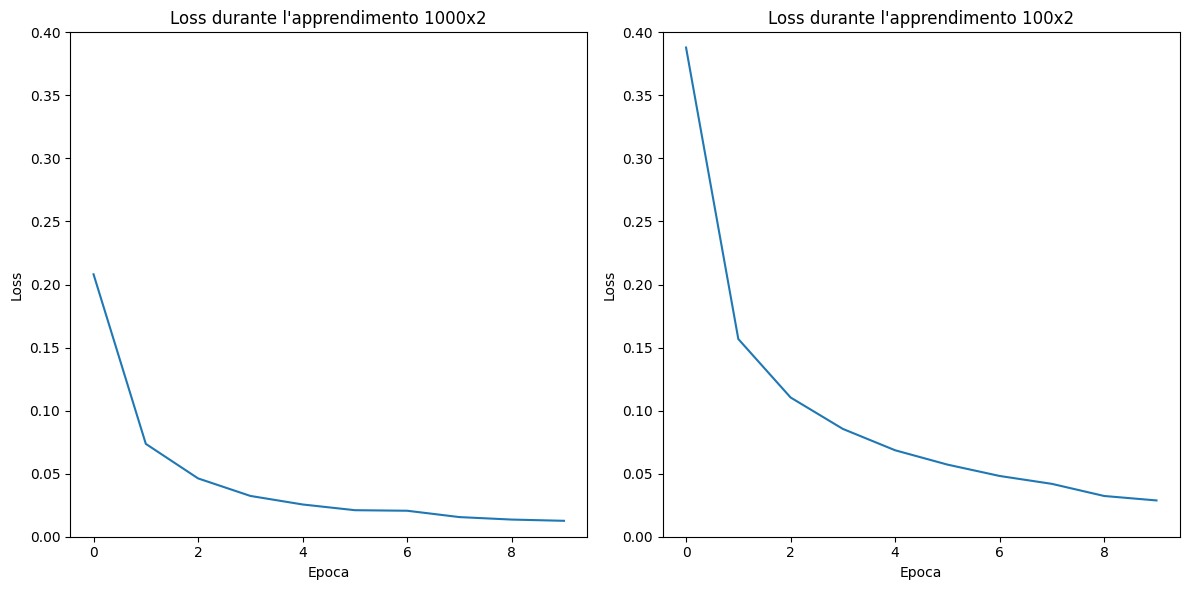

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot
ax1.plot(range(MLP_more.n_iter_), MLP_more.loss_curve_)
ax1.set_xlabel("Epoca")
ax1.set_ylabel("Loss")
ax1.set_title("Loss durante l'apprendimento 1000x2")
ax1.set_ylim(0, 0.4)

# Second plot
ax2.plot(range(MLP_less.n_iter_), MLP_less.loss_curve_)
ax2.set_xlabel("Epoca")
ax2.set_ylabel("Loss")
ax2.set_title("Loss durante l'apprendimento 100x2")
ax2.set_ylim(0, 0.4)

plt.tight_layout()

plt.show()

In [ ]:
MLP_more.score(mnist_te_in, mnist_te_out)

0.9787

In [ ]:
MLP_less.score(mnist_te_in, mnist_te_out)

0.9765

##### CONCLUSIONI
Come possiamo notare, entrambi i modelli hanno prestazioni inferiori rispetto a quello con 2 layer da 500 neuroni. Se sul modello 100x2 il motivo può sembrare chiaro, su quello 1000x2 il risultato peggiore è probabilmente causato da un problema di Overfitting. Infatti, siamo andati ad aumentare troppo il numero di neuroni, incrementando significativamente la complessità del modello rispetto ai dati disponibili.

### Punto a - Test 2: Variazione numero di strati


Creiamo ora due nuovi modelli MLP in cui la modifica viene inserita nel numero di layer utilizzati, mantenendo a 500 il numero di neuroni di ciascuno.
Il primo prevede un aumento, da 2 a 3, mentre il secondo una diminuzione, da 2 ad 1.

In [ ]:
random_state = 0

MLP_more_layers = MLPClassifier(hidden_layer_sizes=(500, 500, 500),
                    max_iter = 10,
                    random_state=random_state)

MLP_less_layers = MLPClassifier(hidden_layer_sizes=(500),
                    max_iter = 10,
                    random_state=random_state)

In [ ]:
#2 minuti e 50 secondi
MLP_more_layers = MLP_more_layers.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#1 minuto 15 secondi
MLP_less_layers = MLP_less_layers.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


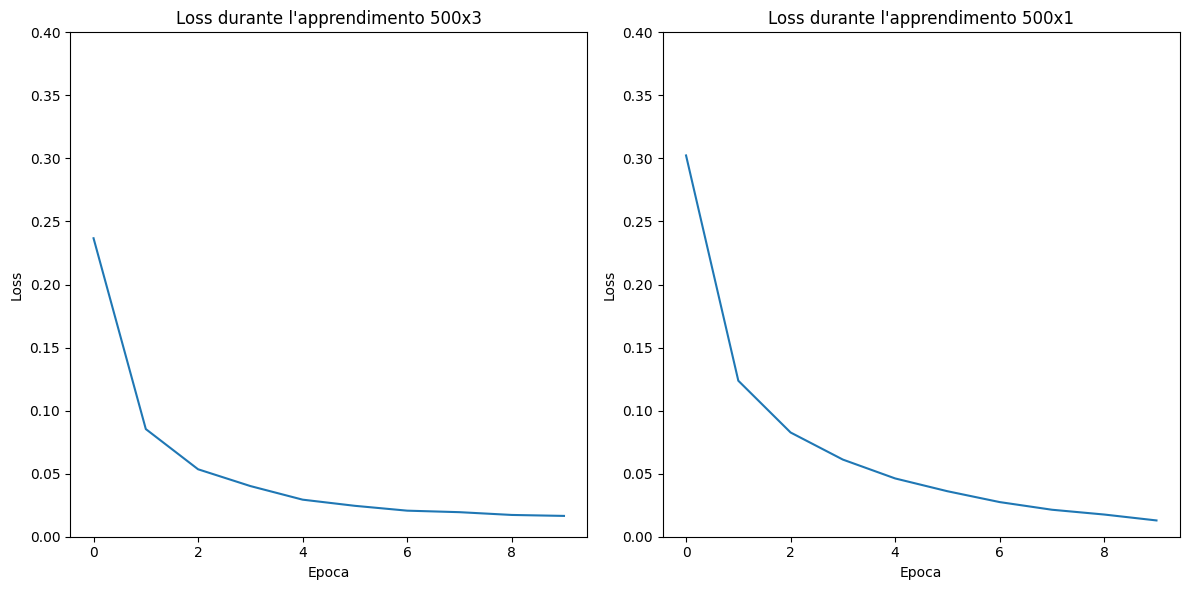

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot
ax1.plot(range(MLP_more_layers.n_iter_), MLP_more_layers.loss_curve_)
ax1.set_xlabel("Epoca")
ax1.set_ylabel("Loss")
ax1.set_title("Loss durante l'apprendimento 500x3")
ax1.set_ylim(0, 0.4)

# Second plot
ax2.plot(range(MLP_less_layers.n_iter_), MLP_less_layers.loss_curve_)
ax2.set_xlabel("Epoca")
ax2.set_ylabel("Loss")
ax2.set_title("Loss durante l'apprendimento 500x1")
ax2.set_ylim(0, 0.4)

plt.tight_layout()

plt.show()

Come possiamo notare dai grafici il modello con più strati nascosti converge più velocemente, ma verso la decima epoca, la differenza risulta minima.

In [ ]:
MLP_more_layers.score(mnist_te_in, mnist_te_out)

0.9807

In [ ]:
MLP_less_layers.score(mnist_te_in, mnist_te_out)

0.9815

Al contrario di quanto visto dal grafico del loss nell'apprendimento, controintuitivamente, la rete con un solo layer nascosto performa meglio sui dati di test, cioè quelli che effettivamente a noi interessano. Questo ci induce a pensare che aumentare il numero di layer porti ad un possibile overfitting sui dati di training e che quindi il set di dati non sia così complesso da richiedere più strati (per le performance e tempo che stiamo cercando). Possiamo anche notare che l'utilizzo di un solo strato ottiene uno score maggiore anche in confronto a quello standard con due strati (1 layer -> 0.9815, 2 layer -> 0.9811).

### Punto a - Test 3: Variazione numero di epoche



Il prossimo test che eseguiremo applicherà una variazione al numero di epoche utilizzate dai modelli per allenarsi sui dati.

In [ ]:
random_state = 0

MLP_more_epochs = MLPClassifier(hidden_layer_sizes=(500, 500),
                    max_iter = 100,
                    random_state=random_state)

MLP_less_epochs = MLPClassifier(hidden_layer_sizes=(500, 500),
                    max_iter = 4,
                    random_state=random_state)

In [ ]:
#10 minuti
MLP_more_epochs = MLP_more_epochs.fit(mnist_tr_in, mnist_tr_out)

In [ ]:
#1 minuto 13 secondi
MLP_less_epochs = MLP_less_epochs.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

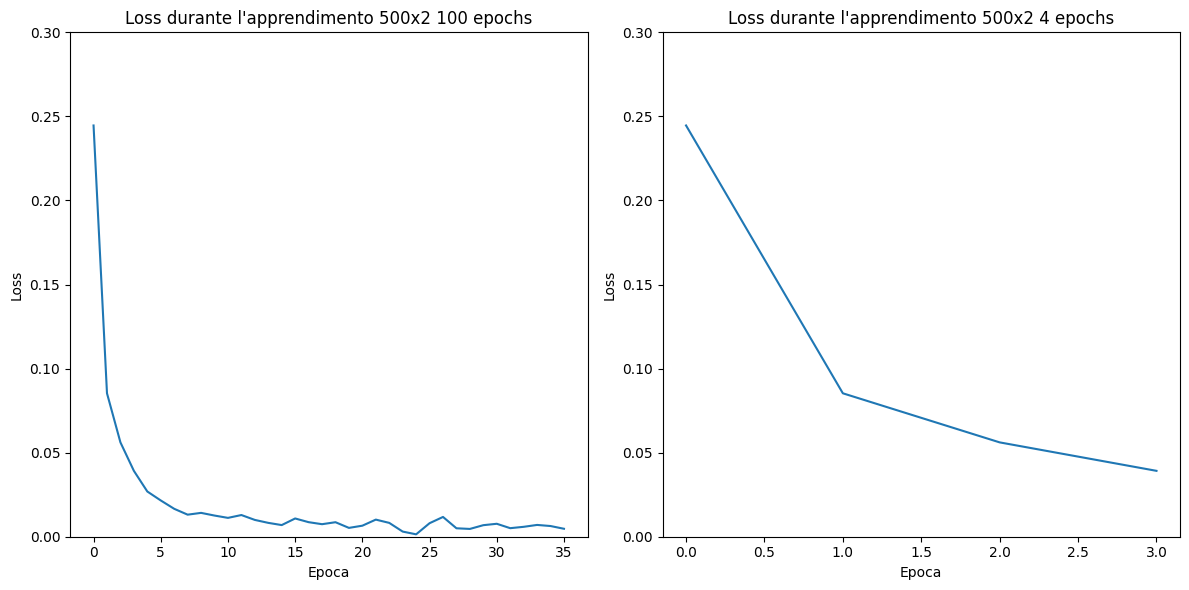

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot
ax1.plot(range(MLP_more_epochs.n_iter_), MLP_more_epochs.loss_curve_)
ax1.set_xlabel("Epoca")
ax1.set_ylabel("Loss")
ax1.set_title("Loss durante l'apprendimento 500x2 100 epochs")
ax1.set_ylim(0, 0.3)

# Second plot
ax2.plot(range(MLP_less_epochs.n_iter_), MLP_less_epochs.loss_curve_)
ax2.set_xlabel("Epoca")
ax2.set_ylabel("Loss")
ax2.set_title("Loss durante l'apprendimento 500x2 4 epochs")
ax2.set_ylim(0, 0.3)

plt.tight_layout()

plt.show()

Come si nota dai grafici, la diminuzione drastica di epoche non lascia il tempo alla rete di convergere ad una soluzione ottimale. Invece, aumentarlo di molto risulta inutilmente dispendioso in quanto già dalla ventiquattresima epoca si vede il raggiungimento di un minimo. Ovviamente, questo non ci indica che sia il punto in cui il modello è maggiormente preciso (o meglio, ci dice che lo è, ma solamente nei dati di training, non in quelli di test, che sono più importanti). Tuttavia, ciò ci fa capire che molte epoche risultano inutili e che rischierebbero di portare ad un caso di overfitting sui dati di training.

In [ ]:
MLP_more_epochs.score(mnist_te_in, mnist_te_out)

0.9818

In [ ]:
MLP_less_epochs.score(mnist_te_in, mnist_te_out)

0.9746

Dallo score si nota come il numero maggiore di epoche vada a migliorare la precisione del modello rispetto alle sole 4 dell'altro. Però a livello computazionale non ha portato ad un grande miglioramento rispetto alle 10 del modello base, pur mettendoci un tempo notevolmente maggiore.

### Punto a - test 4: Variazioni complessive

Prendiamo ora in analisi tutto ciò che abbiamo visto nelle simulazioni precedenti e cerchiamo di prendere il meglio da ognuna. Combiamo quindi le modifiche agli iperparametri, che hanno portato un miglioramento alla rete, tenendo un occhio di riguardo per i modelli che riescono ad ottenere uno score superiore a quello di partenza, rimanendo in un tempo di training simile.

In [ ]:
random_state = 0

MLP_complex_500 = MLPClassifier(hidden_layer_sizes=(500),
                    max_iter = 24,
                    random_state=random_state)

MLP_complex_700 = MLPClassifier(hidden_layer_sizes=(700),
                    max_iter = 24,
                    random_state=random_state)

MLP_complex_1000 = MLPClassifier(hidden_layer_sizes=(1000),
                    max_iter = 24,
                    random_state=random_state)

Dalle simulazioni precedenti abbiamo quindi preso:


*   24 epoche, che ci danno la sicurezza di avere un buon fit sui dati
*   1 solo hidden layer, poiché per il dataset utilizzato, più di uno sembra essere non necessario per le prestazioni che stiamo cercando

Come si può notare, abbiamo fatto poi anche una modifica ai 3 MLP per vedere se aumentare il numero di neuroni portasse ad un miglioramento dello score.

In [ ]:
#2 minuti 40 secondi
MLP_complex_500 = MLP_complex_500.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#4 minuti 30 secondi
MLP_complex_700 = MLP_complex_700.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#6 minuti
MLP_complex_1000 = MLP_complex_1000.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

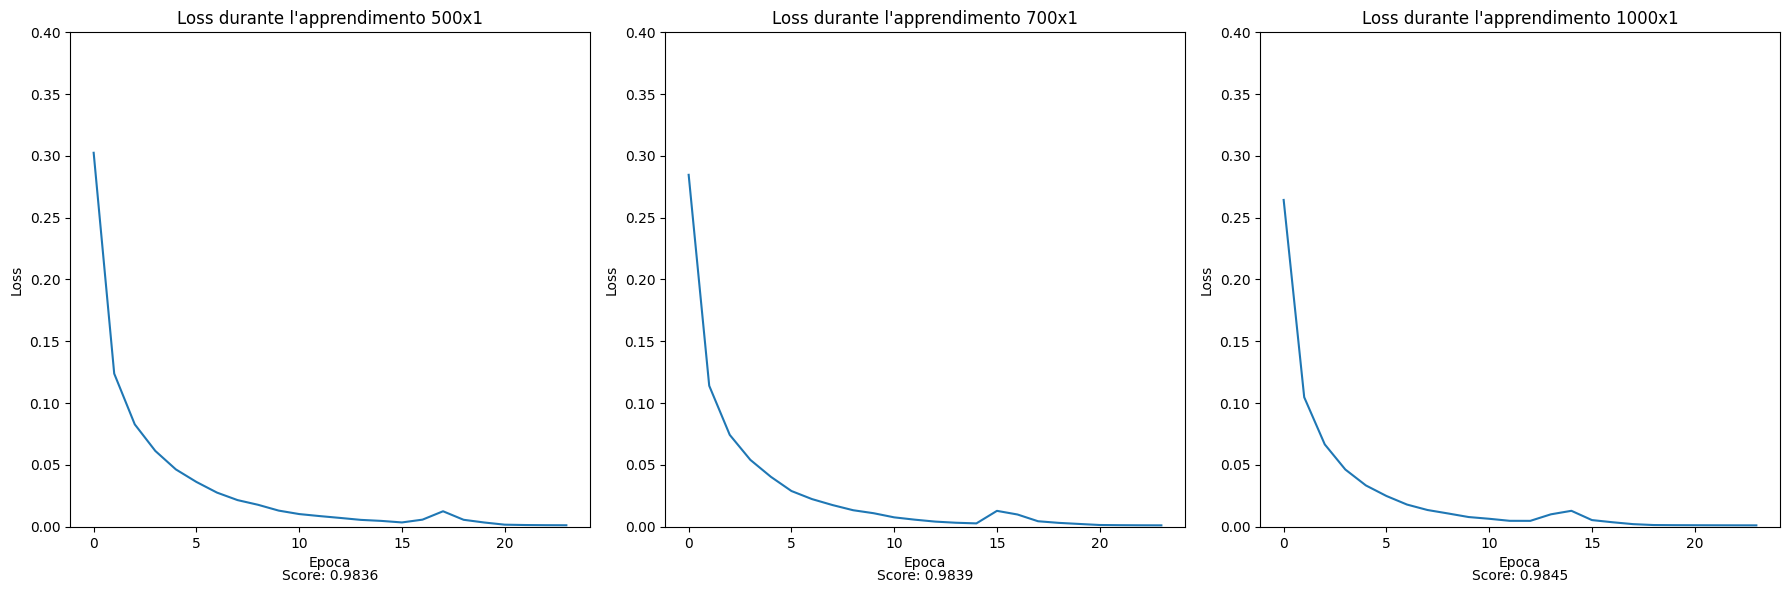

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# First plot
ax1.plot(range(MLP_complex_500.n_iter_), MLP_complex_500.loss_curve_)
ax1.set_xlabel("Epoca")
ax1.set_ylabel("Loss")
ax1.set_title("Loss durante l'apprendimento 500x1")
ax1.set_ylim(0, 0.4)
score_more = MLP_complex_500.score(mnist_te_in, mnist_te_out)
ax1.text(0.5, -0.1, f'Score: {score_more:.4f}', ha='center', va='center', transform=ax1.transAxes)

# Second plot
ax2.plot(range(MLP_complex_700.n_iter_), MLP_complex_700.loss_curve_)
ax2.set_xlabel("Epoca")
ax2.set_ylabel("Loss")
ax2.set_title("Loss durante l'apprendimento 700x1")
ax2.set_ylim(0, 0.4)
score_more = MLP_complex_700.score(mnist_te_in, mnist_te_out)
ax2.text(0.5, -0.1, f'Score: {score_more:.4f}', ha='center', va='center', transform=ax2.transAxes)

# Third plot
ax3.plot(range(MLP_complex_1000.n_iter_), MLP_complex_1000.loss_curve_)
ax3.set_xlabel("Epoca")
ax3.set_ylabel("Loss")
ax3.set_title("Loss durante l'apprendimento 1000x1")
ax3.set_ylim(0, 0.4)
score_more = MLP_complex_1000.score(mnist_te_in, mnist_te_out)
ax3.text(0.5, -0.1, f'Score: {score_more:.4f}', ha='center', va='center', transform=ax3.transAxes)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Una volta allenati, possiamo notare come effettivamente si abbia un miglioramento rispetto all'MLP di partenza: tutti e 3 i test hanno uno score maggiore, che aumenta all'aumentare dei neuroni. Visto l'elevato numero di epoche rispetto al test di partenza, il tempo aumenta drasticamente sopratutto nell'ultima rete. Però il modello con 500 neuroni ed un solo layer performa meglio e in un tempo minore rispetto ai due layer da 500 neuroni ciascuno in 10 epoche.

Successivamente ho eseguito dei test per chiarire meglio dove fossero i limiti di queste ottimizzazioni.

In [ ]:
random_state = 0

MLP_complex_1100 = MLPClassifier(hidden_layer_sizes=(1100),
                    max_iter = 24,
                    random_state=random_state)

In [ ]:
#10 minuti
MLP_complex_1100 = MLP_complex_1100.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
random_state = 0

MLP_complex_1200 = MLPClassifier(hidden_layer_sizes=(1200),
                    max_iter = 24,
                    random_state=random_state)

In [ ]:
MLP_complex_1200 = MLP_complex_1200.fit(mnist_tr_in, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


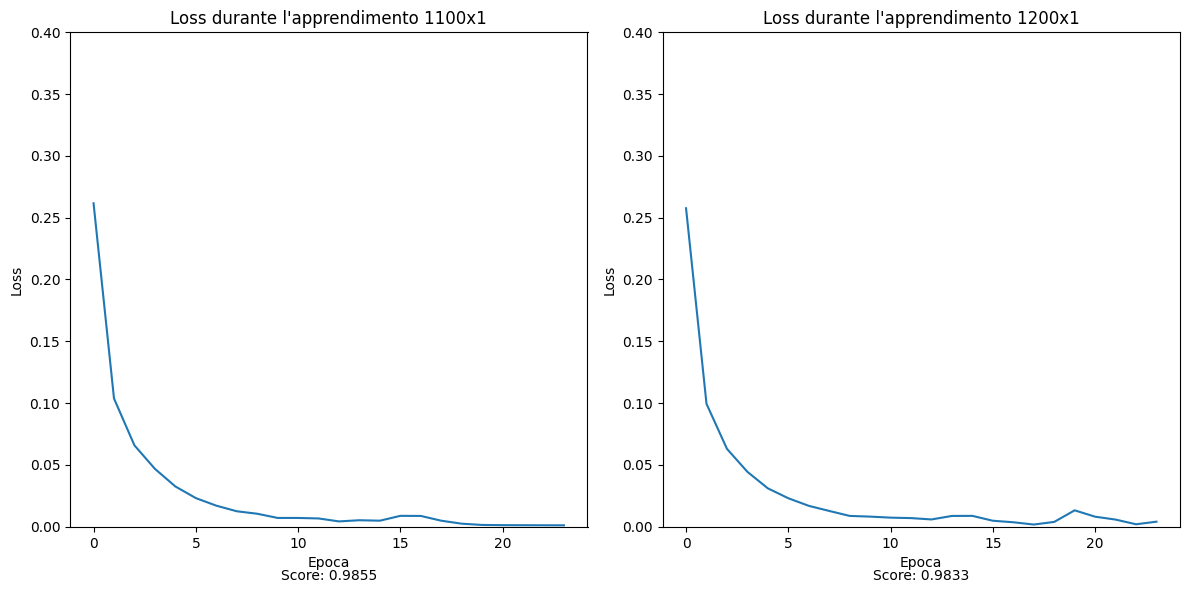

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot
ax1.plot(range(MLP_complex_1100.n_iter_), MLP_complex_1100.loss_curve_)
ax1.set_xlabel("Epoca")
ax1.set_ylabel("Loss")
ax1.set_title("Loss durante l'apprendimento 1100x1")
ax1.set_ylim(0, 0.4)
score_more = MLP_complex_1100.score(mnist_te_in, mnist_te_out)
ax1.text(0.5, -0.1, f'Score: {score_more:.4f}', ha='center', va='center', transform=ax1.transAxes)

# Second plot
ax2.plot(range(MLP_complex_1200.n_iter_), MLP_complex_1200.loss_curve_)
ax2.set_xlabel("Epoca")
ax2.set_ylabel("Loss")
ax2.set_title("Loss durante l'apprendimento 1200x1")
ax2.set_ylim(0, 0.4)
score_more = MLP_complex_1200.score(mnist_te_in, mnist_te_out)
ax2.text(0.5, -0.1, f'Score: {score_more:.4f}', ha='center', va='center', transform=ax2.transAxes)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Come prima cosa possiamo vedere che, dopo i 1100 neuroni sul singolo layer nascosto, lo score ricomincia a decrescere. Questo probabilmente indica  un aumento di complessità troppo elevato della rete, che porta ad un overfitting sui dati di allenamento.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9845

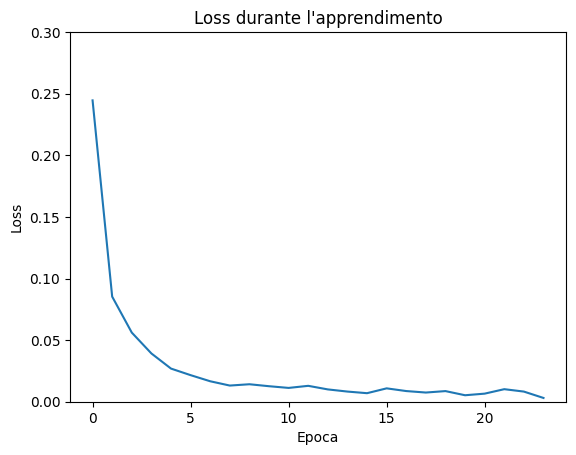

In [ ]:
random_state = 0

MLP_complex = MLPClassifier(hidden_layer_sizes=(500, 500),
                    max_iter = 24,
                    random_state=random_state)
#9 minuti 30 secondi
MLP_complex = MLP_complex.fit(mnist_tr_in, mnist_tr_out)
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
_ = plt.plot(range(MLP_complex.n_iter_), MLP_complex.loss_curve_)
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")
plt.ylim(0, 0.3);
MLP_complex.score(mnist_te_in, mnist_te_out)

Qui invece possiamo notare come portando a 24 le epoche dell'MLP di partenza anche il suo score aumenti, ma di conseguenza anche il tempo impiegato è circa 5 volte quello della rete con 500 neuroni in un solo layer, portando ad un miglioramento solo di 0.0009 nello score.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9854

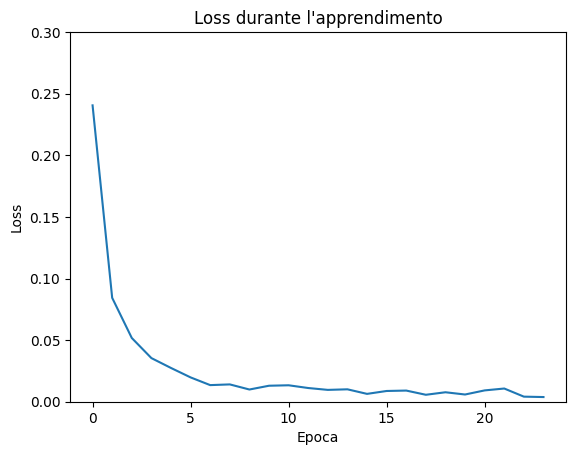

In [ ]:
random_state = 0

MLP_complex = MLPClassifier(hidden_layer_sizes=(700, 300),
                    max_iter = 24,
                    random_state=random_state)
#8 minuti
MLP_complex = MLP_complex.fit(mnist_tr_in, mnist_tr_out)
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
_ = plt.plot(range(MLP_complex.n_iter_), MLP_complex.loss_curve_)
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")
plt.ylim(0, 0.3);
MLP_complex.score(mnist_te_in, mnist_te_out)

Un'altro test che ho voluto mettere in pratica è quello di avere due layer nascosti con numero di neuroni diversi, in particolare il primo più grande (700) e il secondo più piccolo (300), in modo da ridurre la dimensionalità, così il modello dovrebbe essere in grado di trovare le features più rilevanti al primo livello e poi comprimerle e generalizzarle al secondo. In questo modo riusciamo ad ottenere risultati molto simili a quelli con un singolo layer, ma in tempi leggermente ridotti.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9872

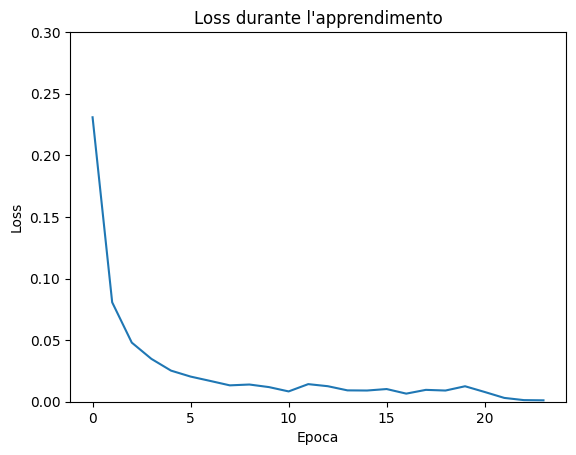

In [ ]:
random_state = 0

MLP_complex = MLPClassifier(hidden_layer_sizes=(700, 500),
                    max_iter = 24,
                    random_state=random_state)
#9 minuti 30 secondi
MLP_complex = MLP_complex.fit(mnist_tr_in, mnist_tr_out)
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
_ = plt.plot(range(MLP_complex.n_iter_), MLP_complex.loss_curve_)
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")
plt.ylim(0, 0.3);
MLP_complex.score(mnist_te_in, mnist_te_out)

Questo è il risultato migliore che sono riuscito ad ottenere, ma richiede un tempo superiore rispetto a quello che stiamo cercando per l'allenamento.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9809

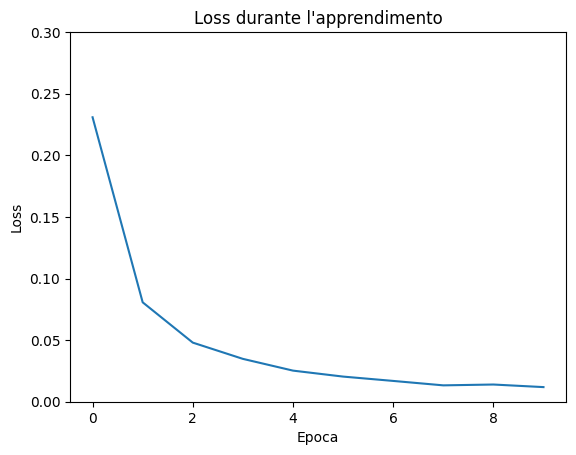

In [ ]:
random_state = 0

MLP_complex = MLPClassifier(hidden_layer_sizes=(700, 500),
                    max_iter = 10,
                    random_state=random_state)
MLP_complex = MLP_complex.fit(mnist_tr_in, mnist_tr_out)
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
_ = plt.plot(range(MLP_complex.n_iter_), MLP_complex.loss_curve_)
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")
plt.ylim(0, 0.3);
MLP_complex.score(mnist_te_in, mnist_te_out)

### Punto a - test 5: Variazione funzione di attivazione

Infine, andiamo a provare la modifica di altri iperparametri, come impostare un early stopping (che in realtà non è stato utilizzato per i test svolti) e il cambio della funzione di attivazione da "relu", quella di default, a "tanh".

In [ ]:
# Step 3: Transform the data to the range [-1, 1]
mnist_tr_in_tan = mnist_tr_in * 2 - 1
mnist_te_in_tan = mnist_te_in * 2 - 1

Come prima cosa trasformiamo i dati che avevamo nell'intervallo [0,1] all'intervallo [-1,1] in questo modo utilizziamo a pieno la funzione "tanh".



In [ ]:
MLP_tan = MLPClassifier(hidden_layer_sizes=(500, 500),
                    max_iter = 10,
                    random_state=random_state,
                    activation = 'tanh',
                    early_stopping = True) #Setto l'utilizzo di early stopping

In [ ]:
#3 minuti 30 secondi
MLP_tan = MLP_tan.fit(mnist_tr_in_tan, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

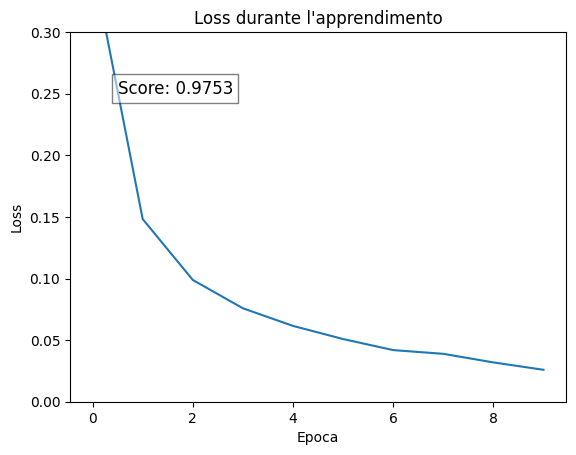

In [ ]:
# Assuming MLP_complex is already trained
score = MLP_tan.score(mnist_te_in_tan, mnist_te_out)

# Plotting the loss curve
plt.plot(range(MLP_tan.n_iter_), MLP_tan.loss_curve_)
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.title("Loss durante l'apprendimento")
plt.ylim(0, 0.3)

# Adding the score to the plot
plt.text(0.5, 0.25, f'Score: {score:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()

In [ ]:
MLP_tan = MLPClassifier(hidden_layer_sizes=(700),
                    max_iter = 23,
                    random_state=random_state,
                    activation = 'tanh',
                    early_stopping = True)

In [ ]:
#6 minuti
MLP_tan = MLP_tan.fit(mnist_tr_in_tan, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (23) reached and the optimization hasn't converged yet.
  warnings.warn(


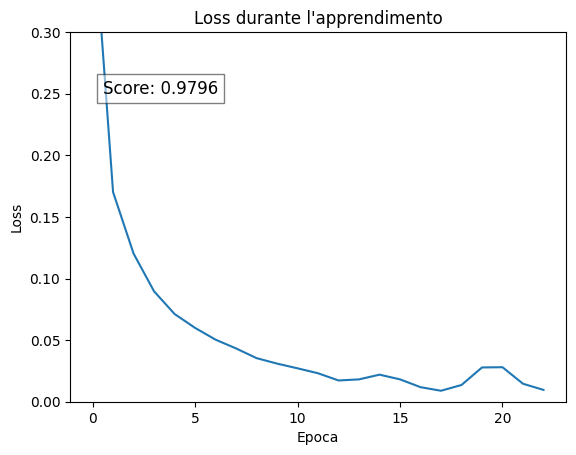

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# Assuming MLP_complex is already trained
score = MLP_tan.score(mnist_te_in_tan, mnist_te_out)

# Plotting the loss curve
plt.plot(range(MLP_tan.n_iter_), MLP_tan.loss_curve_)
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.title("Loss durante l'apprendimento")
plt.ylim(0, 0.3)

# Adding the score to the plot
plt.text(0.5, 0.25, f'Score: {score:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()

Con questi due esempi, possiamo vedere come sia lo score che il tempo sono peggiorati rispetto all'utilizzo di relu. Il tempo maggiore è dovuto alla complessità più alta del calcolo della funzione di attivazione. Per quanto riguarda le performance, si possono trovare dimostrazioni di come "relu" funzioni meglio con dati sotto forma di immagini, come nel nostro caso.

## Punto a - CNN

### Introduzione

Creiamo ora dei test e a modifichiamo gli iperparametri di Convolutional Neural Networks. Al contrario dell'MLP, le CNN possono lavorare più facilmente in parallelo. Infatti, l'attivazione della GPU per l'elaborazione di queste reti porta ad un drastico miglioramento nelle tempistiche (in alcuni casi anche più di 10 volte).

In [ ]:
from tensorflow import keras
mnist_tr_in_conv = mnist_tr_in.reshape(-1, 28, 28, 1)
mnist_te_in_conv = mnist_te_in.reshape(-1, 28, 28, 1)

In [ ]:
CNN = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)

In [ ]:
CNN.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

In [ ]:
CNN_history = CNN.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0147 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0113 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.004

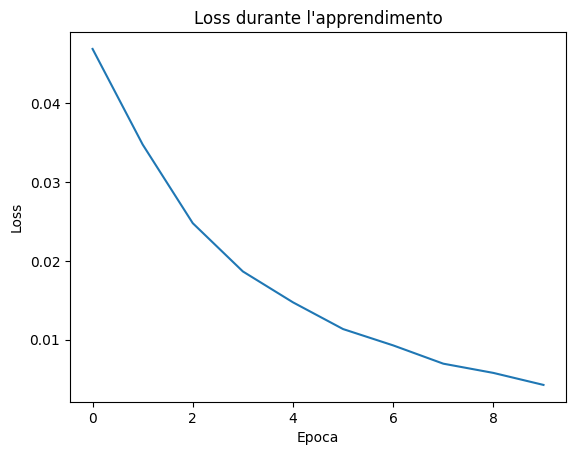

In [ ]:
_ = plt.plot(range(10), CNN_history.history['loss'])
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")

In [ ]:
CNN_test_loss, CNN_test_accuracy = CNN.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9800


Vediamo già dal test base che l'accuracy è circa allo stesso livello di quella dell'MLP, però, grazie all'utilizzo della GPU il tempo è nettamente inferiore.

### CNN - test 1: variazione numero di epoche

In [ ]:
from tensorflow import keras

In [ ]:
mnist_tr_in_conv = mnist_tr_in.reshape(-1, 28, 28, 1)
mnist_te_in_conv = mnist_te_in.reshape(-1, 28, 28, 1)

In [ ]:
CNN_more_epochs = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)

CNN_lot_epochs = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)

In [ ]:
CNN_more_epochs.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

CNN_lot_epochs.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

In [ ]:
CNN_more_epochs_history = CNN_more_epochs.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1796 - accuracy: 0.9485
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0707 - accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0177 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.008

In [ ]:
CNN_lot_epochs_history = CNN_lot_epochs.fit(mnist_tr_in_conv, mnist_tr_out, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1817 - accuracy: 0.9478
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0692 - accuracy: 0.9801
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0488 - accuracy: 0.9855
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9888
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0272 - accuracy: 0.9915
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9959
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.006

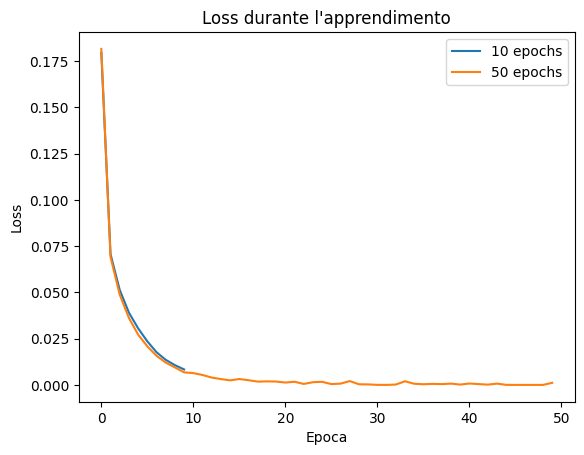

In [ ]:
# Plot training loss
plt.plot(range(len(CNN_more_epochs_history.history['loss'])), CNN_more_epochs_history.history['loss'], label='10 epochs')

# Plot validation loss
plt.plot(range(len(CNN_lot_epochs_history.history['loss'])), CNN_lot_epochs_history.history['loss'], label='50 epochs')

# Add labels and title
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.title("Loss durante l'apprendimento")

# Add legend to differentiate the two plots
plt.legend()

In [ ]:
CNN_more_epochs_test_loss, CNN_more_epochs_test_accuracy = CNN_more_epochs.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0920 - accuracy: 0.9785


In [ ]:
CNN_lot_epochs_test_loss, CNN_lot_epochs_test_accuracy = CNN_lot_epochs.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.1575 - accuracy: 0.9829


In [ ]:
CNN_mid_epochs = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)
CNN_mid_epochs.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

CNN_mid_epochs_history = CNN_mid_epochs.fit(mnist_tr_in_conv, mnist_tr_out, epochs=19)

Epoch 1/19
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1933 - accuracy: 0.9449
Epoch 2/19
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0732 - accuracy: 0.9782
Epoch 3/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9843
Epoch 4/19
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0403 - accuracy: 0.9870
Epoch 5/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0312 - accuracy: 0.9902
Epoch 6/19
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9929
Epoch 7/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0166 - accuracy: 0.9946
Epoch 8/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9957
Epoch 9/19
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 10/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.007

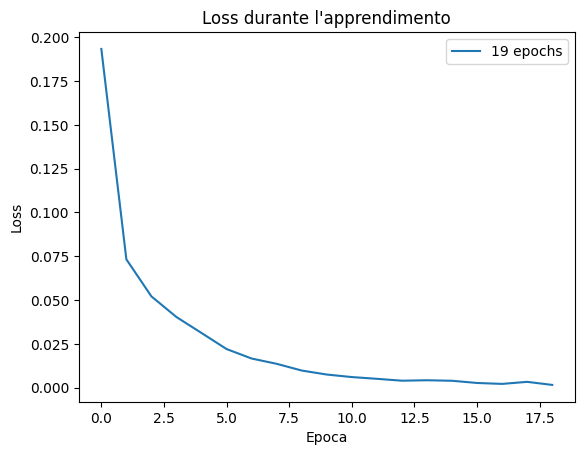

In [ ]:
# Plot training loss
plt.plot(range(len(CNN_mid_epochs_history.history['loss'])), CNN_mid_epochs_history.history['loss'], label='19 epochs')

# Add labels and title
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.title("Loss durante l'apprendimento")

# Add legend to differentiate the two plots
plt.legend()

In [ ]:
_, _ = CNN_mid_epochs.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.1077 - accuracy: 0.9819


Si può notare come 10 epoche non siano sufficienti, ma allo stesso tempo come un numero troppo elevato non porti a prestazioni molto più accurate. Si è trovato un buon compromesso intorno alle 19 epoche.

### CNN - test 2: variazione dimensione kernel

In [ ]:
from tensorflow import keras
mnist_tr_in_conv = mnist_tr_in.reshape(-1, 28, 28, 1)
mnist_te_in_conv = mnist_te_in.reshape(-1, 28, 28, 1)

In [ ]:
CNN_big_kernel = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)

CNN_samll_kernel = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)

In [ ]:
CNN_big_kernel.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

CNN_samll_kernel.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

In [ ]:
CNN_big_kernel_history = CNN_big_kernel.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1641 - accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0293 - accuracy: 0.9907
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.004

In [ ]:
CNN_small_kernel_history = CNN_samll_kernel.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2354 - accuracy: 0.9337
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0867 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0204 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0155 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0126 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.010

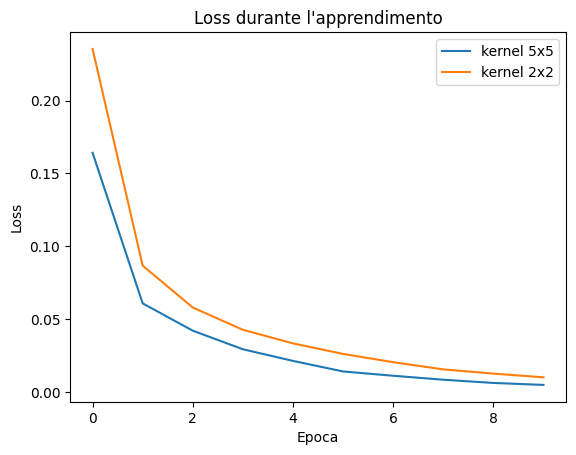

In [ ]:
# Plot training loss
plt.plot(range(len(CNN_big_kernel_history.history['loss'])), CNN_big_kernel_history.history['loss'], label='kernel 5x5')

# Plot validation loss
plt.plot(range(len(CNN_small_kernel_history.history['loss'])), CNN_small_kernel_history.history['loss'], label='kernel 2x2')

# Add labels and title
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.title("Loss durante l'apprendimento")

# Add legend to differentiate the two plots
plt.legend()

In [ ]:
CNN_big_kernel_test_loss, CNN_big_kernel_test_accuracy = CNN_big_kernel.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9830


In [ ]:
CNN_samll_kernel_test_loss, CNN_samll_kernel_test_accuracy = CNN_samll_kernel.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9756


Su questo test possiamo vedere qualcosa di interessante, l'aumento della dimensione del kernel porta ad un aumento delle prestazioni. Questo fenomeno può essere dovuto al fatto che il dataset da noi utilizzato lavora principalmente sulla posizione e forma di bordi. Questi definiscono i numeri,  che i kernel più grandi sono più specializzati nel fare. Infatti, i kernel più piccoli potrebbero cercare in dettagli pattern poco rilevanti che porterebbero ad una generale diminuzione delle prestazioni.

### CNN - test 3: variazione numero di filtri

In [ ]:
from tensorflow import keras
mnist_tr_in_conv = mnist_tr_in.reshape(-1, 28, 28, 1)
mnist_te_in_conv = mnist_te_in.reshape(-1, 28, 28, 1)

In [ ]:
CNN_more_filters = keras.models.Sequential(
    [keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)

CNN_less_filters = keras.models.Sequential(
    [keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)

In [ ]:
CNN_more_filters.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

CNN_less_filters.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

In [ ]:
CNN_more_filters_history = CNN_more_filters.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1634 - accuracy: 0.9527
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0613 - accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0408 - accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.004

In [ ]:
CNN_less_filters_history = CNN_less_filters.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2685 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1117 - accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0756 - accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0574 - accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0449 - accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0367 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0248 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

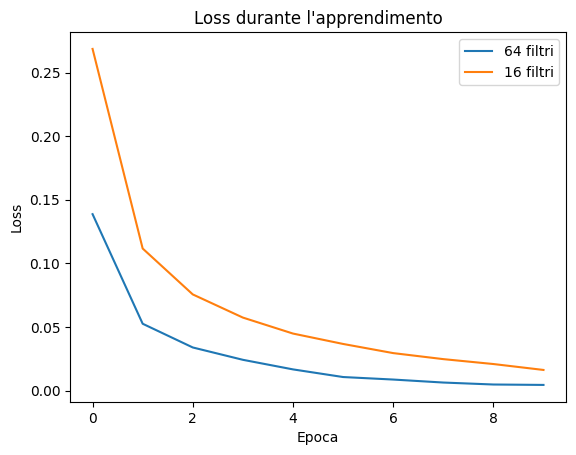

In [ ]:
# Plot training loss
plt.plot(range(len(CNN_more_filters_history.history['loss'])), CNN_more_filters_history.history['loss'], label='64 filtri')

# Plot validation loss
plt.plot(range(len(CNN_less_filters_history.history['loss'])), CNN_less_filters_history.history['loss'], label='16 filtri')

# Add labels and title
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.title("Loss durante l'apprendimento")

# Add legend to differentiate the two plots
plt.legend()

In [ ]:
CNN_more_filters_test_loss, CNN_more_filters_test_accuracy = CNN_more_filters.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9853


In [ ]:
CNN_less_filters_test_loss, CNN_less_filters_test_accuracy = CNN_less_filters.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9773


L'aumento del numero di filtri in questo caso, come ci si potrebbe aspettare, porta ad un drastico miglioramento sull'accuratezza del modello. Questo perché il maggior numero di filtri permette alla rete di imparare meglio alcuni pattern che possono portare alla distinzione di cifre scritte in maniera molto simile.

### CNN - test 4: variazione numero di neuroni

In [ ]:
from tensorflow import keras
mnist_tr_in_conv = mnist_tr_in.reshape(-1, 28, 28, 1)
mnist_te_in_conv = mnist_te_in.reshape(-1, 28, 28, 1)

In [ ]:
CNN_more_neurons = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=100, activation='softmax')]
)

CNN_less_neurons = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=25, activation='softmax')]
)

In [ ]:
CNN_more_neurons.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

CNN_less_neurons.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

In [ ]:
CNN_more_neurons_history = CNN_more_neurons.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1877 - accuracy: 0.9471
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0476 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0356 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0198 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0081 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [ ]:
CNN_less_neurons_history = CNN_less_neurons.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1777 - accuracy: 0.9490
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0126 - accuracy: 0.9960
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0097 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.007

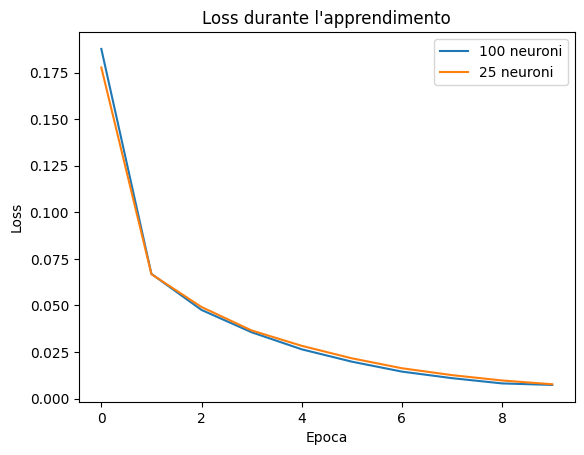

In [ ]:
# Plot training loss
plt.plot(range(len(CNN_more_neurons_history.history['loss'])), CNN_more_neurons_history.history['loss'], label='100 neuroni')

# Plot validation loss
plt.plot(range(len(CNN_less_neurons_history.history['loss'])), CNN_less_neurons_history.history['loss'], label='25 neuroni')

# Add labels and title
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.title("Loss durante l'apprendimento")

# Add legend to differentiate the two plots
plt.legend()

In [ ]:
CNN_more_neurons_test_loss, CNN_more_neurons_test_accuracy = CNN_more_neurons.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9808


In [ ]:
CNN_less_neurons_test_loss, CNN_less_neurons_test_accuracy = CNN_less_neurons.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9820


In questo caso, probabilmente a causa di un leggero overfitting con 100 neuroni, la rete con soli 25 neuroni ottiene una precisione, anche se di poco, maggiore e con un tempo ridotto. Questo può essere dovuto ad una generalizzazine migliore da parte del modello con 25 neuroni, riuscendo ad individuare i pattern fondamentali

### CNN - test 5: aggiunta batch

In [ ]:
from tensorflow import keras
mnist_tr_in_conv = mnist_tr_in.reshape(-1, 28, 28, 1)
mnist_te_in_conv = mnist_te_in.reshape(-1, 28, 28, 1)

In [ ]:
CNN_batch = keras.models.Sequential(
    [keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Flatten(),
     keras.layers.Dense(units=50, activation='softmax')]
)

In [ ]:
CNN_batch.compile(optimizer='adam',
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

In [ ]:
CNN_batch_history = CNN_batch.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1434 - accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0528 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0323 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0151 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0148 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0087 - accuracy: 0.9971
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

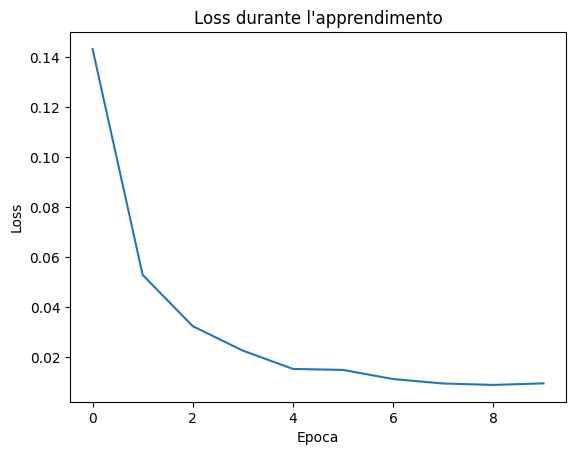

In [ ]:
_ = plt.plot(range(10), CNN_batch_history.history['loss'])
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")

In [ ]:
CNN_batch_test_loss, CNN_batch_test_accuracy = CNN_batch.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 3ms/step - loss: 0.1493 - accuracy: 0.9788


### CNN - test 6: modifica learning rate

Di seguito si trova il codice necessario all'allenamento di 6 CNN con differenti learning rate.

In [ ]:
import keras
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

Allenamento con learning rate: 0.01
Validation accuracy with learning rate 0.01: 0.9754

Allenamento con learning rate: 0.003
Validation accuracy with learning rate 0.003: 0.9834

Allenamento con learning rate: 0.001
Validation accuracy with learning rate 0.001: 0.9815

Allenamento con learning rate: 0.0003
Validation accuracy with learning rate 0.0003: 0.9844

Allenamento con learning rate: 0.0001
Validation accuracy with learning rate 0.0001: 0.9863

Allenamento con learning rate: 1e-05
Validation accuracy with learning rate 1e-05: 0.9497


Accuracy for different learning rates:
   Learning Rate  Accuracy
0        0.01000    0.9754
1        0.00300    0.9834
2        0.00100    0.9815
3        0.00030    0.9844
4        0.00010    0.9863
5        0.00001    0.9497


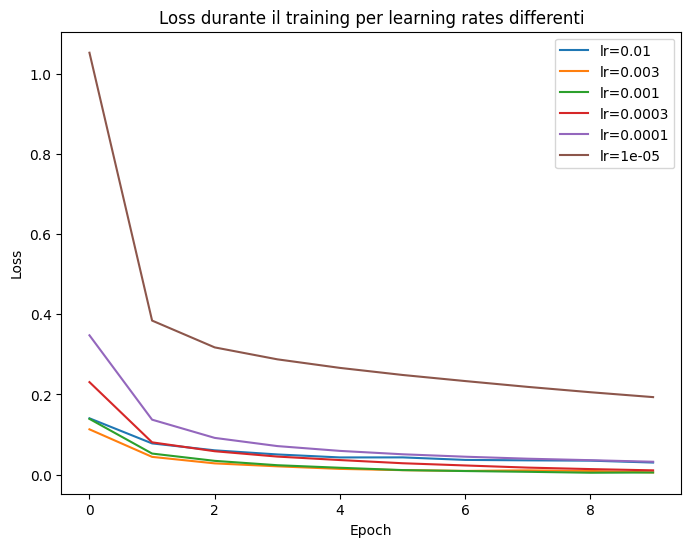

In [ ]:
CNN = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=25, activation='softmax')
])

learning_rates = [0.01, 0.003, 0.001, 0.0003, 0.0001, 0.00001]
results = []

plt.figure(figsize=(8, 6))

for lr in learning_rates:
    print(f"Allenamento con learning rate: {lr}")

    CNN = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=25, activation='softmax')
    ])

    CNN.compile(optimizer=Adam(learning_rate=lr),
                metrics=["accuracy"],
                loss='sparse_categorical_crossentropy')

    # Alleno il modello
    history = CNN.fit(mnist_tr_in_conv, mnist_tr_out, epochs=10, verbose=0)

    plt.plot(range(len(history.history['loss'])), history.history['loss'], label=f'lr={lr}')

    # Valuto la sua precisione
    loss, accuracy = CNN.evaluate(mnist_te_in_conv, mnist_te_out, verbose=0)
    print(f"Validation accuracy with learning rate {lr}: {accuracy:.4f}\n")

    # Salvo i dati per la tabella
    results.append({"Learning Rate": lr, "Accuracy": accuracy})

# Add labels and title to the plot
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss durante il training per learning rates differenti")
plt.legend()

# Create a DataFrame to display the results as a table
results_df = pd.DataFrame(results)

# Print the table
print("\nAccuracy for different learning rates:")
print(results_df)

# Show the plot
plt.show()

I risultati ci mostrano come la variazione del learning rate possa portare a notevoli differenze. Con un learning rate molto basso il modello converge troppo lentamente e può rischire di stabilizzarsi su minimi locali non ottimali. Allo stesso modo rate troppo elevati hanno la possibilità di fuggire da minimi efficienti andando a peggiorare la precisione.

In [ ]:
CNN_conclusion = keras.models.Sequential(
    [keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=25, activation='softmax')]
)

In [ ]:
CNN_conclusion.compile(optimizer=Adam(learning_rate=0.00005),
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

In [ ]:
CNN_conclusion_history = CNN_conclusion.fit(mnist_tr_in_conv, mnist_tr_out, epochs=19)

Epoch 1/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0102 - accuracy: 0.9978
Epoch 2/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - accuracy: 0.9982
Epoch 3/19
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0087 - accuracy: 0.9986
Epoch 4/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0083 - accuracy: 0.9987
Epoch 5/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0076 - accuracy: 0.9987
Epoch 6/19
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0071 - accuracy: 0.9990
Epoch 7/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0067 - accuracy: 0.9990
Epoch 8/19
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0063 - accuracy: 0.9992
Epoch 9/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0056 - accuracy: 0.9993
Epoch 10/19
1875/1875 [==============================] - 6s 3ms/step - loss: 0.005

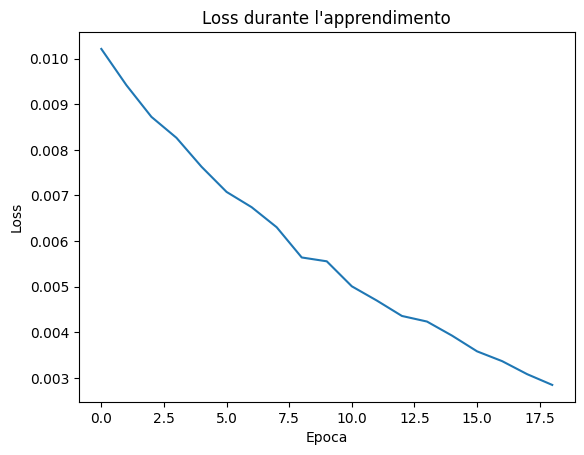

In [ ]:
_ = plt.plot(range(19), CNN_conclusion_history.history['loss'])
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")

In [ ]:
_,_ = CNN_conclusion.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9850


È interessante notare come concedendo ad un learning rate più epoche per potersi allenare sui dati, questo riesca quasi a superare in performance alcuni dei modelli migliori che abbiamo visto precedentemente. Notiamo come il grafico della perdita sia quasi lineare questa volta, questo perché la discesa al minimo è molto più lenta avendo degli step più piccoli.

### CNN - Test 7: Conclusioni

In [ ]:
from tensorflow import keras
from keras.optimizers import Adam
mnist_tr_in_conv = mnist_tr_in.reshape(-1, 28, 28, 1)
mnist_te_in_conv = mnist_te_in.reshape(-1, 28, 28, 1)

In [ ]:
CNN_conclusion = keras.models.Sequential(
    [keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
     keras.layers.Flatten(),
     keras.layers.Dense(units=25, activation='softmax')]
)

In [ ]:
CNN_conclusion.compile(optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"],
              loss='sparse_categorical_crossentropy')

In [ ]:
CNN_conclusion_history = CNN_conclusion.fit(mnist_tr_in_conv, mnist_tr_out, epochs=19)

Epoch 1/19
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0602 - accuracy: 0.9822
Epoch 2/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0379 - accuracy: 0.9880
Epoch 3/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 4/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 5/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 6/19
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 7/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0070 - accuracy: 0.9976
Epoch 8/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 9/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 10/19
1875/1875 [==============================] - 5s 3ms/step - loss: 0.003

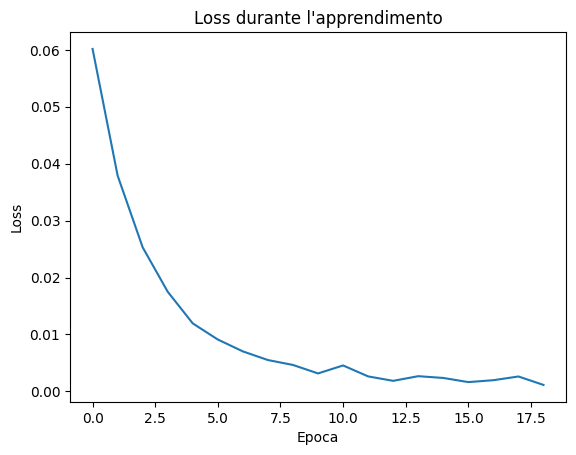

In [ ]:
_ = plt.plot(range(19), CNN_conclusion_history.history['loss'])
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")

In [ ]:
_,_ = CNN_conclusion.evaluate(mnist_te_in_conv, mnist_te_out)

313/313 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9859


Si nota come, effettivamente, combinando i miglioramenti individuati nei test preccedenti, si riesce a trovare una CNN che performi meglio rispetto a quella iniziale.

In [ ]:
CNN_predict = CNN_conclusion.predict(mnist_te_in_conv)
CNN_test_predictions_labels = np.argmax(CNN_predict, axis=1)

313/313 [==============================] - 1s 2ms/step


# DOMANDA B: Cifre più complesse da riconoscere

## Punto b - cifre più complesse da riconoscere

In [ ]:
MLP_test_predictions = MLP.predict(mnist_te_in)
MLP_500_test_predictions = MLP_complex_500.predict(mnist_te_in)

Digit 9 is confused with digit 7: 1.19%
Digit 9 is confused with digit 4: 1.16%
Digit 7 is confused with digit 2: 0.75%
Digit 5 is confused with digit 3: 0.71%
Digit 4 is confused with digit 9: 0.64%
Digit 3 is confused with digit 5: 0.53%
Digit 2 is confused with digit 8: 0.39%
Digit 8 is confused with digit 7: 0.38%
Digit 9 is confused with digit 5: 0.36%
Digit 3 is confused with digit 9: 0.36%


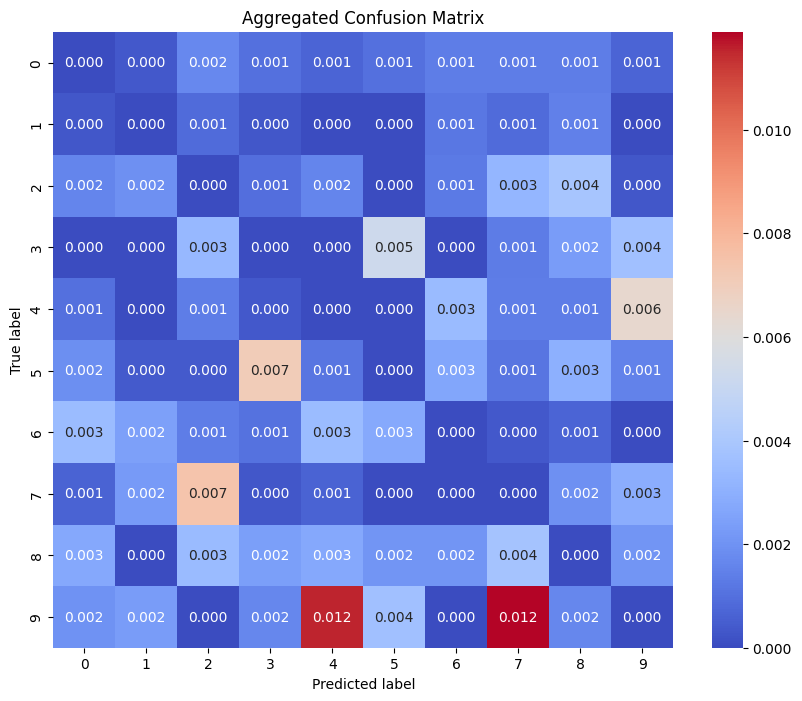

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Creaiamo una lista dei modelli che vogliamo usare per ottenere le informazioni sulle cifre più confuse
true_labels_list = [mnist_te_out, mnist_te_out, mnist_te_out]
predictions_list = [CNN_test_predictions_labels, MLP_test_predictions, MLP_500_test_predictions]

# iniziamo con tutti i valori a 0
aggregate_cm = np.zeros((10, 10))

for true_labels, predictions in zip(true_labels_list, predictions_list):
    # Generiamo la matrice di confusione per ogni modello interessato
    cm = confusion_matrix(true_labels, predictions)

    cm_float = cm.astype('float')            # trasformo la matrice in float invece che interi
    # Sommo i valori di ogni riga in modo da vedere ognuno quante volte è comparso per poter poi calcolare la percentuale
    row_sums = cm.sum(axis=1)
    # Faccio la trasposta del vettore in modo da poter eseguire l'operazione di divisione per il calcolo della percenutale
    row_sums_reshaped = row_sums[:, np.newaxis]
    # calcolo in percentuale quante volte un numero è stato confuso per un altro
    cm_normalized = cm_float / row_sums_reshaped

    # Sommo i risultati ottenuti con quelli ottenuti in precedenza
    aggregate_cm += cm_normalized

# Faccio la media con il numero di modelli che ho utilizzato per questa statistica
aggregate_cm /= len(predictions_list)

# Elimino i valori nella diagonale che non ci interessano essendo predizioni corrette
np.fill_diagonal(aggregate_cm, 0)

# Prendo gli indici dei numeri più confusi
most_confused_indices = np.unravel_index(np.argsort(aggregate_cm, axis=None)[::-1], aggregate_cm.shape)

most_confused_pairs = [(i, j, aggregate_cm[i, j] * 100) for i, j in zip(most_confused_indices[0], most_confused_indices[1]) if aggregate_cm[i, j] > 0]

for pair in most_confused_pairs[:10]:  # Stampo le 10 coppie di numeri più confusi
    print(f'Digit {pair[0]} is confused with digit {pair[1]}: {pair[2]:.2f}%')

import matplotlib.pyplot as plt
import seaborn as sns

# stampo la matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(aggregate_cm, annot=True, fmt=".3f", cmap="coolwarm")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Aggregated Confusion Matrix')
plt.show()

Come si può vedere da questa tabella, le cifre che i migliori modelli ottenuti confondono più spesso sono il 9 con il 4 e il 7. Si può capire la somiglianza, visto che entrambi seguono all'incirca lo stesso percorso dall'angolo sinistro alto a quello sinistro basso. Si possono notare però due cose interessanti:


*   Mi sarei aspettato di vedere una tabella molto più speculare rispetto alla diagonale principale, e invece ad esempio, il 7 non viene scambiato per 9 tante volte quanto il 9 viene scambiato per 7, questo fenomeno si può vedere anche in altre cifre
*   Il nuemro 5 viene confuso molto spesso con il nuemro 3. Un risultato che non mi sarei aspettato, ma che si può ricondurre allo stesso pattern nella parte inferiore dei numeri, aventi entrambi la stessa curva.



# DOMANDA C: Riduzione pattern di training

In [ ]:
# Calcolo quant'è il 15% dei dati di training
num_elements_to_select = int(len(mnist_tr_in) * 0.15)

# Decido di prendere i dati in maniera casuale, quindi genero un array di indici casuali
random_indices = np.random.choice(len(mnist_tr_in), num_elements_to_select, replace=False)

# Seleziono i dati da mnist corrispondenti agli indici generati
reduced_mnist_tr_in = mnist_tr_in[random_indices]

# Effettuo lo stesso processo anche per i dati target
reduced_mnist_tr_out = mnist_tr_out[random_indices]

In [ ]:
random_state = 0
MLP_complex_500_reduced = MLPClassifier(hidden_layer_sizes=(500),
                    max_iter = 24,
                    random_state=random_state)

In [ ]:
MLP_complex_500_reduced = MLP_complex_500_reduced.fit(reduced_mnist_tr_in, reduced_mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


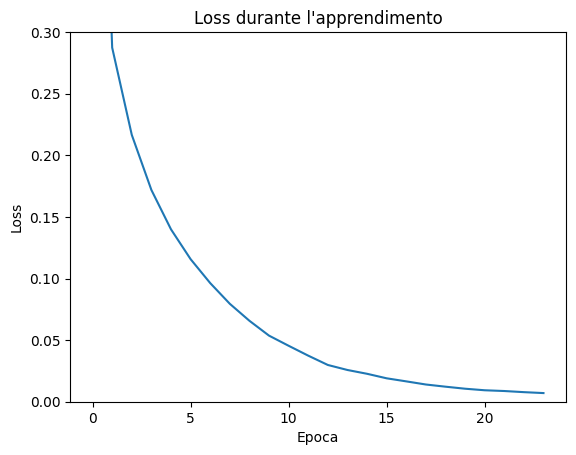

In [ ]:
_ = plt.plot(range(MLP_complex_500_reduced.n_iter_), MLP_complex_500_reduced.loss_curve_)
_ = plt.xlabel("Epoca")
_ = plt.ylabel("Loss")
_ = plt.title("Loss durante l'apprendimento")
plt.ylim(0, 0.3);

In [ ]:
MLP_complex_500_reduced.score(mnist_te_in, mnist_te_out)

0.9623

Si può vedere come la riduzione dei dati di training non influisca in maniera significativa sulla convergenza della loss durante l'apprendimento, ma porta il modello ad essere meno performante nella fase di test. Questo si nota sullo score, che mostra una diminuzione ripetto alle simulazioni avviate precedentemente.

# DOMANDA D: Aggiunta di rumore

In [ ]:
def _inject_Gaussian_noise(mnist_data, noise_level):
  dataset_size = mnist_data.shape
  random_gaussian_vector = np.random.normal(loc = 0, scale = noise_level, size = dataset_size)
  noisy_images = mnist_data + random_gaussian_vector
  noisy_images = np.clip(noisy_images,0,1)
  return noisy_images

## test 1: Variazione rumore dati training

Questi test serviranno a comprendere cosa accade se si va ad applicare del rumore ai dati di training. A questo scopo ho prodotto 2 varianti con rumore gaussiano differente sui dati di allenamento, mentre viene lasciato un rumore del 50% sui dati di test.

In [ ]:
tr_noise_level = 0.2
mnist_tr_with_noise = _inject_Gaussian_noise(mnist_tr_in, tr_noise_level)

In [ ]:
tr_noise_level = 0.4
mnist_tr_with_noise_4 = _inject_Gaussian_noise(mnist_tr_in, tr_noise_level)

In [ ]:
te_noise_level = 0.5
mnist_te_with_noise = _inject_Gaussian_noise(mnist_te_in, te_noise_level)

In [ ]:
random_state = 0
MLP_complex_500_noise = MLPClassifier(hidden_layer_sizes=(500),
                    max_iter = 24,
                    random_state=random_state)

MLP_complex_500_noise_4 = MLPClassifier(hidden_layer_sizes=(500),
                    max_iter = 24,
                    random_state=random_state)

In [ ]:
#4 minuti
MLP_complex_500_noise = MLP_complex_500_noise.fit(mnist_tr_with_noise, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#4 minuti
MLP_complex_500_noise_4 = MLP_complex_500_noise_4.fit(mnist_tr_with_noise_4, mnist_tr_out)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


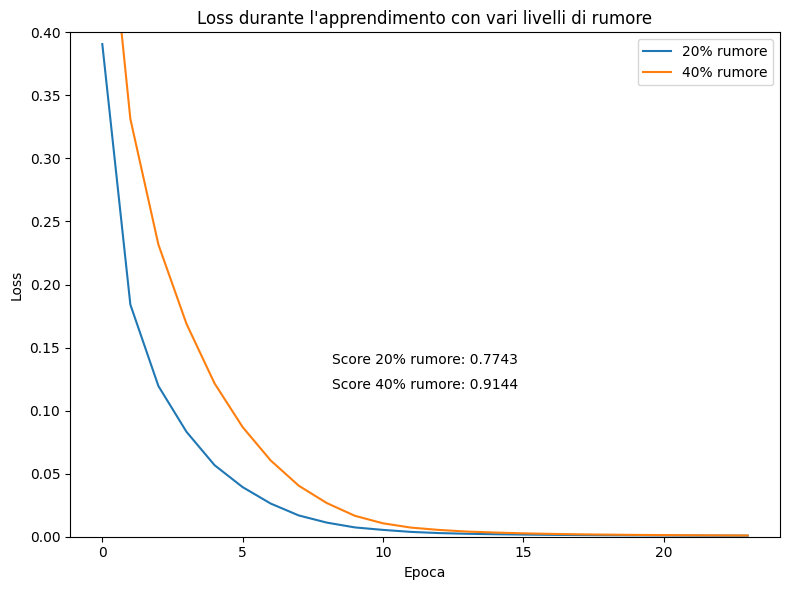

In [ ]:
# Create a figure and a single set of axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the first set of data
ax.plot(range(MLP_complex_500_noise.n_iter_), MLP_complex_500_noise.loss_curve_, label="20% rumore")
# Plot the second set of data
ax.plot(range(MLP_complex_500_noise_4.n_iter_), MLP_complex_500_noise_4.loss_curve_, label="40% rumore")

# Set labels and title
ax.set_xlabel("Epoca")
ax.set_ylabel("Loss")
ax.set_title("Loss durante l'apprendimento con vari livelli di rumore")
ax.set_ylim(0, 0.4)

# Add scores as text annotations
score_more_1 = MLP_complex_500_noise.score(mnist_te_with_noise, mnist_te_out)
score_more_2 = MLP_complex_500_noise_4.score(mnist_te_with_noise, mnist_te_out)
ax.text(0.5, 0.35, f'Score 20% rumore: {score_more_1:.4f}', ha='center', va='center', transform=ax.transAxes)
ax.text(0.5, 0.3, f'Score 40% rumore: {score_more_2:.4f}', ha='center', va='center', transform=ax.transAxes)

# Add a legend
ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Possiamo notare come la curva della perdita durante l'apprendimento riesca a convergere in entrambi i casi. Si ha quindi una rete in grado di riconoscere con sicurezza il numero presentato dai dati di training, pur avendo del rumore. Il problema però lo riscontriamo sul test, in cui le immagini sono ancora  più confuse e mostra come, sopratutto il primo, questi modelli non siano in grado di adattarsi a modifiche importanti sui dati, probabilmente avendo trovato pattern troppo specifici, portando quindi ad overfitting. Ovviamente ci sono differenze tra i due, il secondo, con 40% di rumore, impiega più epoche per stabilizzarsi ad un valore basso di perdita durante il training, questo perché i dati sono più confusi e quindi è più complesso individuare pattern. Però porta la rete ad essere più robusta, ed adattarsi meglio ai cambiamenti, come vediamo nello score su dati nuovi a cui è stato applicato un rumore del 50%.

In [ ]:
MLP_complex_500.score(mnist_te_with_noise, mnist_te_out)

0.5034

Abbiamo anche lo score ottenuto dal modello allenato senza aggiunta di rumore ai dati di training, e vediamo che su test rumorosi la precisione scende drasticamente, classificando correttamente solamente una cifra ogni due. Questo ci mostra quanto la rete sia debole ai cambiamenti, che in questo caso sono immagini con del rumore, in altri potrebbero essere nuovi modi particolari di scrivere un numero. Aumentando il rumore nei dati di training, e lasciando abbastanza epoche per potersi adattare, la nostra rete sarà in grado di apprendere con più chiarezza quali sono i pattern più importanti per il riconoscimento dei numeri.

#### Risultati su test senza rumore

In [ ]:
MLP_complex_500_noise.score(mnist_te_in, mnist_te_out)

0.978

In [ ]:
MLP_complex_500_noise_4.score(mnist_te_in, mnist_te_out)

0.9676

In [ ]:
MLP_complex_500.score(mnist_te_in, mnist_te_out)

0.9836

Ovviamente in test senza rumore il modello che è stato allenato su quei tipi di dato performa meglio rispetto agli altri, ma alla prima modifica inizia a faticare, lo si vedrà dalle curve psicometriche.

## Curve psicometriche

In [ ]:
livelli_di_rumore = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
MLP_500_error = []
MLP_500_noise_error = []
MLP_500_noise_error_4 = []

for livello in livelli_di_rumore:
  mnist_con_rumore = _inject_Gaussian_noise(mnist_te_in, livello)
  accuratezza = MLP_complex_500.score(mnist_con_rumore, mnist_te_out)
  MLP_500_error.append(1-accuratezza)
  accuratezza = MLP_complex_500_noise.score(mnist_con_rumore, mnist_te_out)
  MLP_500_noise_error.append(1-accuratezza)
  accuratezza = MLP_complex_500_noise_4.score(mnist_con_rumore, mnist_te_out)
  MLP_500_noise_error_4.append(1-accuratezza)

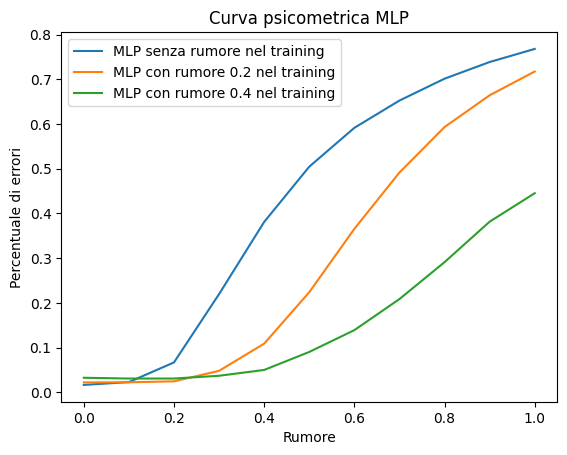

In [ ]:
_ = plt.plot(livelli_di_rumore, MLP_500_error, label="MLP senza rumore nel training")
_ = plt.plot(livelli_di_rumore, MLP_500_noise_error, label="MLP con rumore 0.2 nel training")
_ = plt.plot(livelli_di_rumore, MLP_500_noise_error_4, label="MLP con rumore 0.4 nel training")
_ = plt.xlabel("Rumore")
_ = plt.ylabel("Percentuale di errori")
_ = plt.title("Curva psicometrica MLP")

_ = plt.legend()

_ = plt.show()

Si ha quindi sul piano le curve psicometriche dei vari MLP, cioè la loro resistenza all'inserimento di più o meno rumore sui dati di test. Come si può vedere le predizioni si mantengono stabili circa fino al punto in cui "rumore training" = "rumore test", quindi la confusione con la quale si sono allenati, da lì in poi l'errore comincia a salire ma in modo differente. L'MLP che ha utilizzato dati di training con rumore maggiore riesce a resistere meglio alla variazione sui dati, avendo una crescita più lenta dell'errore.